# 🧩🛡🌲 **Feature Engineering, Regularization & Ensembles**

# 1. Feature Engineering

Feature engineering is the process of turning raw data into useful features that help improve the performance of machine learning models. It includes choosing, creating and adjusting data attributes to make the model’s predictions more accurate. The goal is to make the model better by providing relevant and easy-to-understand information.

A feature or attribute is a measurable property of data that is used as input for machine learning algorithms. Features can be numerical, categorical or text-based representing essential data aspects which are relevant to the problem. For example in housing price prediction, features might include the number of bedrooms, location and property age.

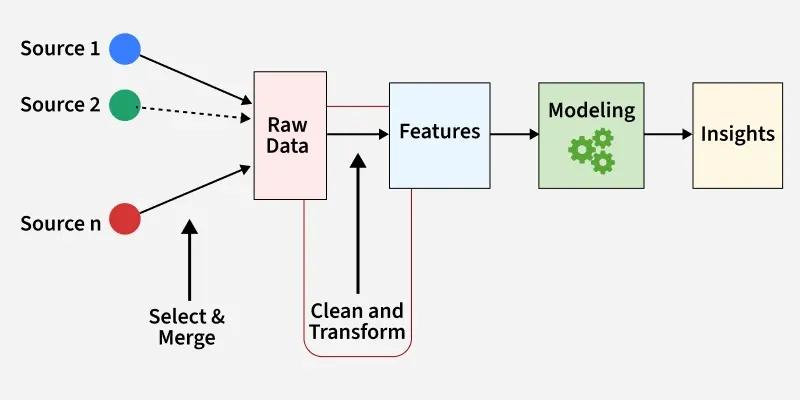

## 🌟Importance of Feature Engineering

Feature engineering can significantly influence model performance. By refining features, we can:

- **Improve accuracy**: Choosing the right features helps the model learn better, leading to more accurate predictions.
- **Reduce overfitting**: Using fewer, more important features helps the model avoid memorizing the data and perform better on new data.
- **Boost interpretability**: Well-chosen features make it easier to understand how the model makes its predictions.
- **Enhance efficiency**: Focusing on key features speeds up the model’s training and prediction process, saving time and resources.
  
## 🔧Process involved in Feature Engineering
Lets see various features involved in feature engineering:


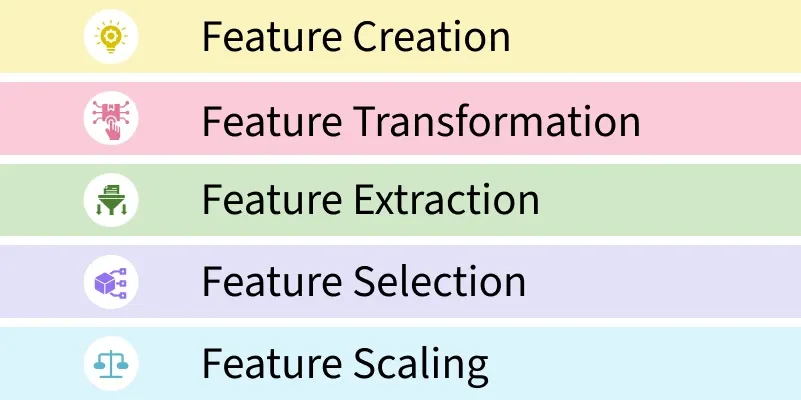

**1. Feature Creation**: Feature creation involves generating new features from domain knowledge or by observing patterns in the data. It can be:

- **Domain-specific**: Created based on industry knowledge likr business rules.
- **Data-driven**: Derived by recognizing patterns in data.
- **Synthetic**: Formed by combining existing features.

**2. Feature Transformation**: Transformation adjusts features to improve model learning:

- **Normalization & Scaling**: Adjust the range of features for consistency.
- **Encoding**: Converts categorical data to numerical form i.e one-hot encoding.
- **Mathematical transformations**: Like logarithmic transformations for skewed data.

**3. Feature Extraction**: Extracting meaningful features can reduce dimensionality and improve model accuracy:

- **Dimensionality reduction**: Techniques like PCA reduce features while preserving important information.
- **Aggregation & Combination**: Summing or averaging features to simplify the model.

**4. Feature Selection**: Feature selection involves choosing a subset of relevant features to use:

- **Filter methods**: Based on statistical measures like correlation.
- **Wrapper methods**: Select based on model performance.
- **Embedded methods**: Feature selection integrated within model training.

**5. Feature Scaling**: Scaling ensures that all features contribute equally to the model:

- **Min-Max scaling**: Rescales values to a fixed range like 0 to 1.
- **Standard scaling**: Normalizes to have a mean of 0 and variance of 1.

## 📝Steps in Feature Engineering

Feature engineering can vary depending on the specific problem but the general steps are:

1. **Data Cleansing:** Identify and correct errors or inconsistencies in the dataset to ensure data quality and reliability.
2. **Data Transformation:** Transform raw data into a format suitable for modeling including scaling, normalization and encoding.
3. **Feature Extraction:** Create new features by combining or deriving information from existing ones to provide more meaningful input to the model.
4. **Feature Selection:** Choose the most relevant features for the model using techniques like correlation analysis, mutual information and stepwise regression.
5. **Feature Iteration:** Continuously refine features based on model performance by adding, removing or modifying features for improvement.

## Common Techniques in Feature Engineering


##### 1. One-Hot Encoding: One-Hot Encoding converts categorical variables into binary indicators, allowing them to be used by machine learning models.

In [1]:
import pandas as pd

data = {'Color': ['Red', 'Blue', 'Green', 'Blue']}
df = pd.DataFrame(data)

df_encoded = pd.get_dummies(df, columns=['Color'], prefix='Color')

print(df_encoded)

   Color_Blue  Color_Green  Color_Red
0       False        False       True
1        True        False      False
2       False         True      False
3        True        False      False


##### 2. Binning: Binning transforms continuous variables into discrete bins, making them categorical for easier analysis.




In [2]:
import pandas as pd

data = {'Age': [23, 45, 18, 34, 67, 50, 21]}
df = pd.DataFrame(data)

bins = [0, 20, 40, 60, 100]
labels = ['0-20', '21-40', '41-60', '61+']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

print(df)

   Age Age_Group
0   23     21-40
1   45     41-60
2   18      0-20
3   34     21-40
4   67       61+
5   50     41-60
6   21     21-40


##### 3. Text Data Preprocessing: Involves removing stop-words, stemming and vectorizing text data to prepare it for machine learning models.




In [5]:
!pip install nltk


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ---------------------------------- ----- 1.3/1.5 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.0 MB/s  0:00:00

   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ------------- -------------------------- 1/3 [regex]
   ------------- -------------------------- 1/3 [regex]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [nltk]
   -------------------------- ------------- 2/3 [n

In [6]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhagi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [7]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

texts = ["This is a sample sentence.", "Text data preprocessing is important."]

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
vectorizer = CountVectorizer()


def preprocess_text(text):
    words = text.split()
    words = [stemmer.stem(word)
             for word in words if word.lower() not in stop_words]
    return " ".join(words)


cleaned_texts = [preprocess_text(text) for text in texts]

X = vectorizer.fit_transform(cleaned_texts)

print("Cleaned Texts:", cleaned_texts)
print("Vectorized Text:", X.toarray())

Cleaned Texts: ['sampl sentence.', 'text data preprocess important.']
Vectorized Text: [[0 0 0 1 1 0]
 [1 1 1 0 0 1]]


##### 4. Feature Splitting: Divides a single feature into multiple sub-features, uncovering valuable insights and improving model performance.




In [8]:
import pandas as pd

data = {'Full_Address': [
    '123 Elm St, Springfield, 12345', '456 Oak Rd, Shelbyville, 67890']}
df = pd.DataFrame(data)

df[['Street', 'City', 'Zipcode']] = df['Full_Address'].str.extract(
    r'([0-9]+\s[\w\s]+),\s([\w\s]+),\s(\d+)')

print(df)

                     Full_Address      Street         City Zipcode
0  123 Elm St, Springfield, 12345  123 Elm St  Springfield   12345
1  456 Oak Rd, Shelbyville, 67890  456 Oak Rd  Shelbyville   67890


## 🛠️ Tools for Feature Engineering

- **Featuretools**: Automates extraction and transformation of features from structured data. Works seamlessly with pandas and scikit-learn.
- **TPOT**: Uses genetic algorithms to optimize pipelines, automating feature selection and model tuning. Visualizes the best feature-algorithm combos.
- **DataRobot**: Automates ML workflows, including feature engineering, model selection, and optimization. Supports text and time-series data.
- **Alteryx**: Drag-and-drop interface for feature extraction, transformation, and cleaning. Ideal for non-programmers.
- **H2O.ai**: Offers both automated and manual feature engineering, including scaling, encoding, and imputation, with interactive visualizations.

---

# **Polynomial features, interaction terms**

# Polynomial Features

Polynomial Features are a type of feature engineering technique used in machine learning to enhance the model’s predictive power by introducing nonlinear relationships. It is widely used in regression and classification problems when linear models struggle to capture complex patterns.

Polynomial features transform the original dataset by adding polynomial terms of the existing features. This allows a linear model (e.g., Linear Regression) to learn nonlinear relationships.

For example, given a dataset with a single feature xx, adding polynomial features up to degree 2 results in:

{x}→{x,x2}\{ x \} \quad \Rightarrow \quad \{ x, x² \}
For multiple features x1,x2x_1, x_2, adding polynomial terms up to degree 2 gives:
{x1,x2}→{x1,x2,x12,x22,x1x2}\{ x_1, x_2 \} \quad \Rightarrow \quad \{ x_1, x_2, x_1², x_2², x_1 x_2 \}

## 📐Mathematical Representation

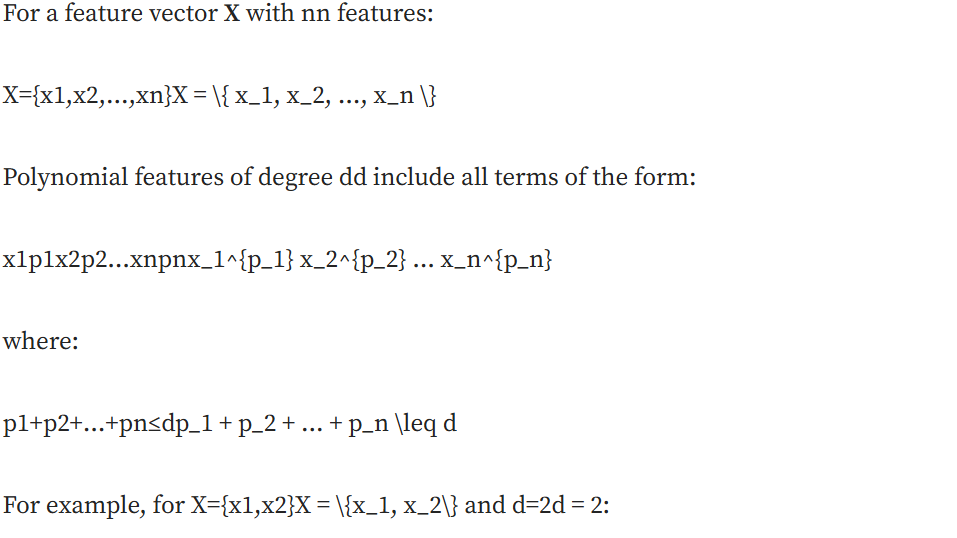

## ✅**When to Use Polynomial Features**

- When a linear model underfits the data.
- When the relationship between input and output is nonlinear.
- When you want to capture interaction effects between features.
- In regression tasks where polynomial regression is needed.

##  ❌**When Not to Use Polynomial Features**

- **High-dimensional data**: Feature explosion leads to computational inefficiency.
- **Noise-sensitive datasets**: High-degree polynomials can overfit noisy data.
- **Better alternatives**: Sometimes, decision trees, SVMs, or neural networks can model nonlinearity better.

### Polynomial Feature Expansion

In [9]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [10]:
# Create a simple dataset
X = np.array([[2], [3], [4]])
# Instantiate PolynomialFeatures (degree = 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
# Transform dataset
X_poly = poly.fit_transform(X)
print("Original X:\n", X)
print("Polynomial Features:\n", X_poly)

Original X:
 [[2]
 [3]
 [4]]
Polynomial Features:
 [[ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]]


In [16]:
# Import libraries
from sklearn.linear_model import LinearRegression

# Sample data with two features
X = np.array([[1, 2],
              [2, 3],
              [3, 4],
              [4, 5],
              [5, 6]])  # Features: x1, x2
y = np.array([5, 11, 19, 29, 41])  # Target

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

print("Original Features:\n", X)
print("Polynomial Features with interactions (degree 2):\n", X_poly)

# Fit linear regression on polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions
y_pred = model.predict(X_poly)
print("Predictions:", y_pred)

# Optional: see feature names
print("Feature names:", poly.get_feature_names_out(['x1', 'x2']))


Original Features:
 [[1 2]
 [2 3]
 [3 4]
 [4 5]
 [5 6]]
Polynomial Features with interactions (degree 2):
 [[ 1.  2.  1.  2.  4.]
 [ 2.  3.  4.  6.  9.]
 [ 3.  4.  9. 12. 16.]
 [ 4.  5. 16. 20. 25.]
 [ 5.  6. 25. 30. 36.]]
Predictions: [ 5. 11. 19. 29. 41.]
Feature names: ['x1' 'x2' 'x1^2' 'x1 x2' 'x2^2']


- Purpose: Transform original features into polynomial and interaction terms so a linear model can capture nonlinear relationships and feature interactions 🔄.

- Process:

  - Start with original features X (e.g., [x1, x2]).

    - Use PolynomialFeatures(degree=2) to expand features to include squares and interaction terms → [x1, x2, x1², x1*x2, x2²] ✅.

    - Fit LinearRegression on these transformed features to model nonlinear patterns.

    - Predict outcomes with the trained model and optionally check feature names.

- Key Benefits:

    - Captures nonlinear relationships even with a linear model 📈.

    - Accounts for interactions between features 🔗.

    - Keeps workflow simple and compatible with scikit-learn pipelines 🛠️.

- Use Case:

    - Regression tasks where simple linear models underfit.

    - Datasets where combined effects of features influence the outcome (interaction terms).

### Using Polynomial Features in Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [12]:
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 5, 10, 17, 26])  # Quadratic pattern
# Create a pipeline with PolynomialFeatures and LinearRegression
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
# Train the model
model.fit(X, y)
# Predictions
y_pred = model.predict(X)
print("Predictions:", y_pred)


Predictions: [ 2.  5. 10. 17. 26.]


## Summary

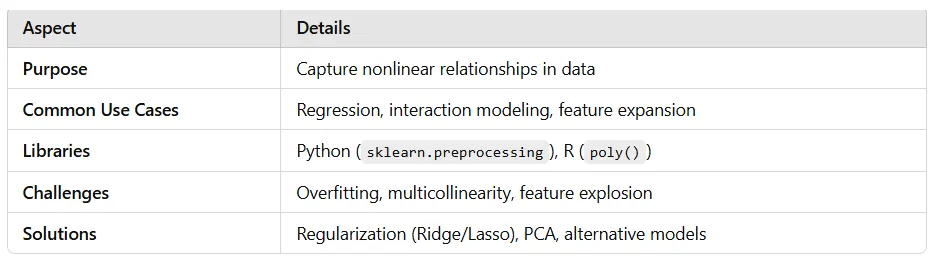

---

# Interaction Terms

Interaction terms show how two or more features work **together** to affect the outcome . They capture situations where the effect of one feature depends on the value of another , revealing combined effects that aren’t obvious from looking at each feature alone. For example, fertilizer and sunlight might each help plant growth, but together they could boost growth even more .

## 🧠**Key Concepts:**

- **Non-additive Effect:** Interaction terms acknowledge that the impact of one predictor on the outcome might be different depending on the level of another predictor.
- **Modeling Flexibility:** They add flexibility to linear models, allowing them to capture more complex relationships between variables.
- **Example:**
    
    Imagine predicting shrub height based on the amount of bacteria in the soil and whether the shrub is in partial or full sun. An interaction term would show if the effect of bacteria on height differs depending on whether the shrub is in partial or full sun.
    
## 🎯**Why Use Interaction Terms?**
    
- **Improved Model Fit:** They can lead to a better fit of the model to the data, especially when the relationship between variables is not straightforward.
- **More Accurate Predictions:** By accounting for complex relationships, interaction terms can improve the model's predictive power.
- **Specific Hypothesis Testing:** They allow researchers to test more precise hypotheses about how variables interact.
    
## 🔍**How to Interpret Interaction Terms:**
    
- **Consider all Coefficients:** You need to consider all coefficients involved in the interaction when interpreting the effect of a variable.
- **Plug in Values:** You can plug in different values of the interacting variable into the regression equation to see how the effect of the main variable changes.
- **Binary Variables:**
        
When one of the interacting variables is binary (e.g., 0 or 1), interpretation is often simpler. The coefficient of the interaction term indicates how the effect of the other variable changes based on the binary variable.

## Mathematically

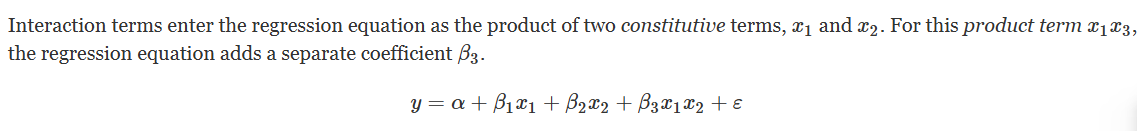

## 🌟Examples

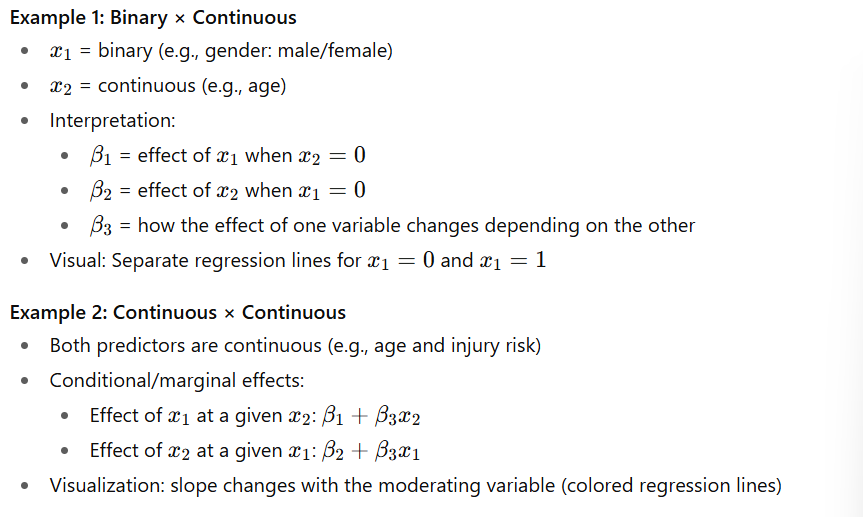

## ⚠️**Important Points Before Modeling**

- Always inspect your data first:
    - Check for sufficient coverage across ranges of predictors.
    - Check linearity between predictors and outcome.
- Include all constitutive terms when modeling an interaction (don’t just include        x1 x2).

## 📐**Standard Errors for Marginal Effects**

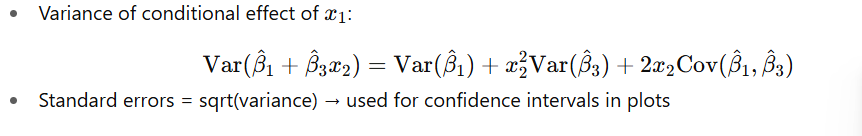

## 📈**Plotting Marginal Effects**

- Rather than plotting separate regression lines for each value, it’s cleaner to plot conditional effects with confidence intervals:
    - Solid line = marginal effect
    - Dashed lines = ±1.96 × SE
    - Helps interpret where effects are statistically significant

## 🌍**Real-World Example**

- Data: Electoral support for extreme right-wing parties
- Predictors: Threshold for representation × Effective number of parties
- Controlled for: Unemployment + country dummies
- Key finding: The effect of electoral thresholds depends on the number of parties (interaction term significant)
- Marginal effect plots visualize this clearly.

## 🛠️**Tools in R**

- **DAintfun2()**: plots marginal effects with distribution indicators (rug/histogram)
- **ggintfun()**: customizable ggplot2 version for marginal effects
- Both automate what you can do manually with coef() and vcov().

## 💡**Key Takeaways**

1. Interaction terms are crucial to understand conditional relationships.
2. Always include constitutive terms and inspect your data first.
3. Marginal effects + confidence intervals are often more informative than raw coefficients.
4. Visualizations help interpret interactions intuitively.
5. R provides both manual and automated ways to calculate and plot these effects.

In [21]:
!pip install statsmodels


C:\Users\bhagi\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


                            OLS Regression Results                            
Dep. Variable:                 growth   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1466.
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           5.53e-09
Time:                        11:01:59   Log-Likelihood:                 17.140
No. Observations:                  10   AIC:                            -26.28
Df Residuals:                       6   BIC:                            -25.07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.6700    

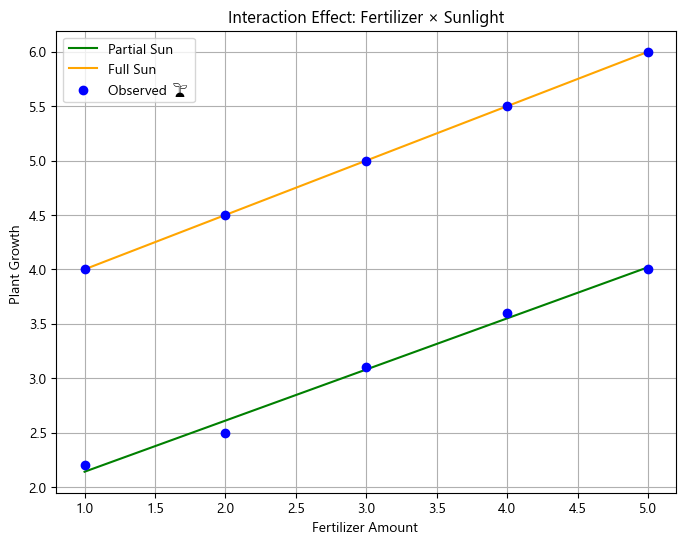

In [22]:
# Interaction term in regression with correct plotting
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

# Set font to support emojis on Windows
plt.rcParams['font.family'] = 'Segoe UI Emoji'

# Sample dataset
data = {
    "fertilizer": [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    "sunlight": [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],  # 0 = Partial, 1 = Full
    "growth": [2.2, 2.5, 3.1, 3.6, 4.0, 4.0, 4.5, 5.0, 5.5, 6.0]
}

df = pd.DataFrame(data)

# Fit OLS model with interaction term
model = smf.ols("growth ~ fertilizer * sunlight", data=df).fit()
print(model.summary())

# Plot marginal effects of fertilizer at each sunlight level
fertilizer_range = np.linspace(df['fertilizer'].min(), df['fertilizer'].max(), 100)

# Predict for sunlight = 0 (Partial Sun)
partial_sun = pd.DataFrame({
    "fertilizer": fertilizer_range,
    "sunlight": 0
})
partial_pred = model.predict(partial_sun)

# Predict for sunlight = 1 (Full Sun)
full_sun = pd.DataFrame({
    "fertilizer": fertilizer_range,
    "sunlight": 1
})
full_pred = model.predict(full_sun)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fertilizer_range, partial_pred, label='Partial Sun ', color='green')
plt.plot(fertilizer_range, full_pred, label='Full Sun ', color='orange')
plt.scatter(df['fertilizer'], df['growth'], color='blue', zorder=5, label='Observed 🌱')
plt.xlabel('Fertilizer Amount ')
plt.ylabel('Plant Growth ')
plt.title('Interaction Effect: Fertilizer × Sunlight')
plt.legend()
plt.grid(True)
plt.show()


- Imports libraries for data, stats, and plotting
- Creates sample data: fertilizer, sunlight, growth
- Builds regression with interaction: `growth ~ fertilizer * sunlight`
- Fits OLS model and prints summary
- Plots actual vs predicted growth for partial/full sun
- Shows interaction: non-parallel lines = effect of fertilizer depends on sunlight

---

# 2. Regularization

Regularization is an important technique in machine learning that helps to improve model accuracy by preventing overfitting which happens when a model learns the training data too well including noise and outliers and perform poor on new data. By adding a penalty for complexity it helps simpler models to perform better on new data. In this article, we will see main types of regularization i.e Lasso, Ridge and Elastic Net and see how they help to build more reliable models.

## **Types of Regularization**

### 1. ✂️**Lasso Regression**
    
A regression model which uses the L1 Regularization technique is called LASSO Least Absolute Shrinking  and Selection Operator regression. It adds the absolute value of magnitude of the coefficient as a penalty term to the loss function(L). This penalty can shrink some coefficients to zero which helps in selecting only the important features and ignoring the less important ones.

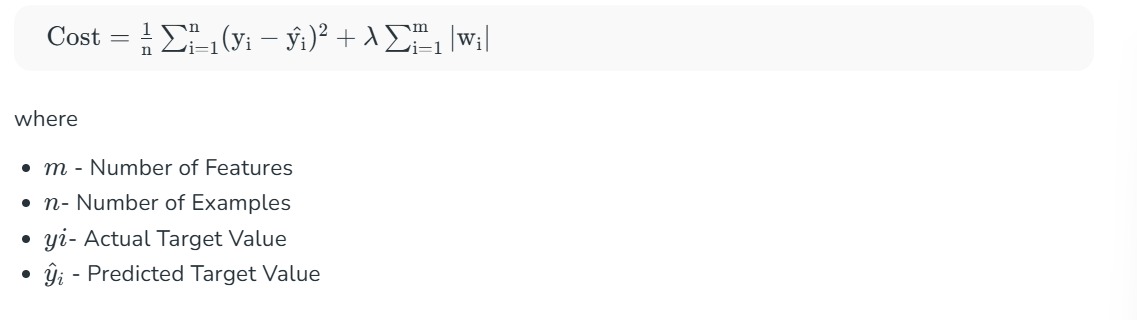

### 🏔️ 2. Ridge Regression

A regression model that uses the L2 regularization technique is called Ridge regression. It adds the squared magnitude of the coefficient as a penalty term to the loss function(L). It handles multicollinearity by shrinking the coefficients of correlated features instead of eliminating them.

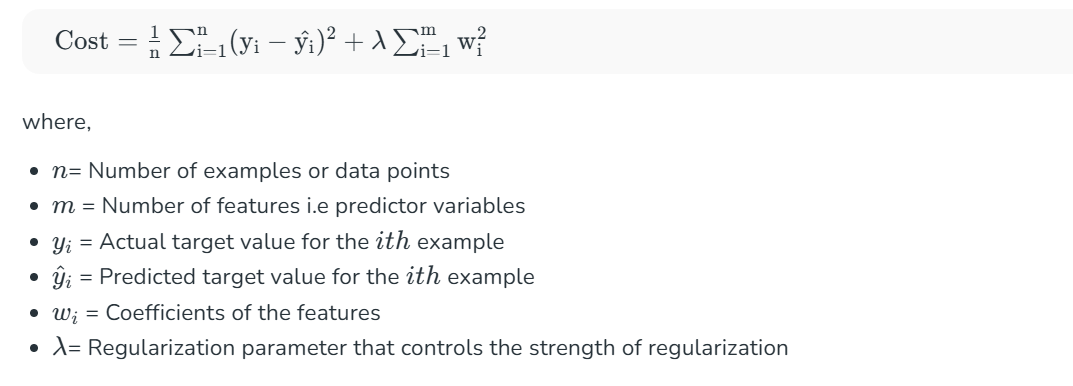

### ⚡ 3. Elastic Net Regression

Elastic Net Regression is a combination of both L1 as well as L2 regularization. That shows that we add the absolute norm of the weights as well as the squared measure of the weights. With the help of an extra hyperparameter that controls the ratio of the L1 and L2 regularization.

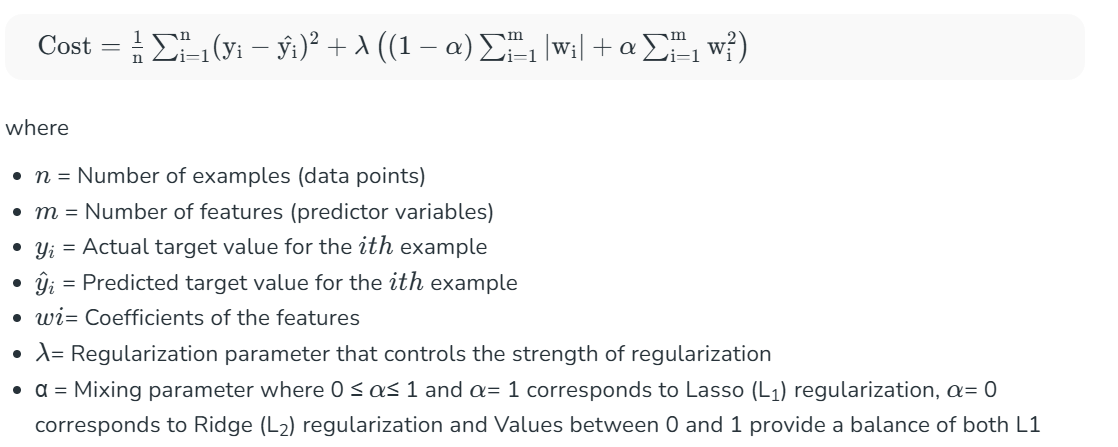

## 🌟Benefits of Regularization

Now, let’s see various benefits of regularization which are as follows:

1. **Prevents Overfitting:** Regularization helps models focus on underlying patterns instead of memorizing noise in the training data.
2. **Improves Interpretability:** L(Lasso) regularization simplifies models by reducing less important feature coefficients to zero.
    
3. **Enhances Performance:** Prevents excessive weighting of outliers or irrelevant features helps in improving overall model accuracy.
4. **Stabilizes Models:** Reduces sensitivity to minor data changes which ensures consistency across different data subsets.
5. **Prevents Complexity:** Keeps model from becoming too complex which is important for limited or noisy data.
6. **Handles Multicollinearity:** Reduces the magnitudes of correlated coefficients helps in improving model stability.
7. **Allows Fine-Tuning:** Hyperparameters like alpha and lambda control regularization strength helps in balancing bias and variance.
8. **Promotes Consistency:** Ensures reliable performance across different datasets which reduces the risk of large performance shifts.

### **What are Overfitting and Underfitting?**🤔

**Overfitting** and **underfitting** are terms used to describe the performance of machine learning models in relation to their ability to generalize from the training data to unseen data.

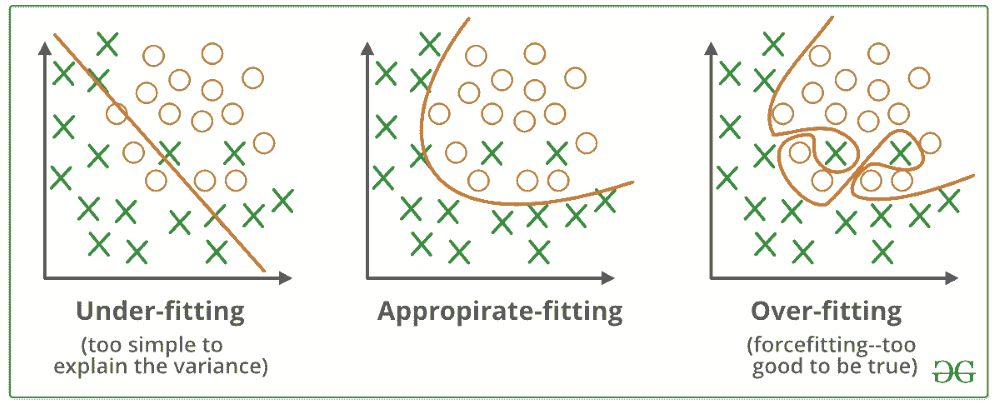

Overfitting happens when a machine learning model learns the training data too well including the noise and random details. This makes the model to perform poorly on new, unseen data because it memorizes the training data instead of understanding the general patterns.

For example, if we only study last week’s weather to predict tomorrow’s i.e our model might focus on one-time events like a sudden rainstorm which won’t help for future predictions.

Underfitting is the opposite problem which happens when the model is too simple to learn even the basic patterns in the data. An underfitted model performs poorly on both training and new data. To fix this we need to make the model more complex or add more features.

For example if we use only the average temperature of the year to predict tomorrow’s weather hence the model misses important details like seasonal changes which results in bad predictions.

### What are Bias and Variance? 🎯

- 🎯**Bias** refers to the errors which occur when we try to fit a statistical model on real-world data which does not fit perfectly well on some mathematical model. If we use a way too simplistic a model to fit the data then we are more probably face the situation of High Bias (underfitting) refers to the case when the model is unable to learn the patterns in the data at hand and perform poorly.
  
- 🌪️**Variance** shows the error value that occurs when we try to make predictions by using data that is not previously seen by the model. There is a situation known as high variance (overfitting) that occurs when the model learns noise that is present in the data.

Finding a proper balance between the two is also known as the Bias-Variance Tradeoff which helps us to design an accurate model.

---

# **L1 (Lasso) & L2 (Ridge)**

# L1(Lasso)

Lasso Regression is a regression method based on **Least Absolute Shrinkage** and **Selection Operator** and is used in regression analysis for variable selection and regularization. It helps remove irrelevant data features and prevents overfitting. This allows features with weak influence to be clearly identified as the coefficients of less important variables are shrunk toward zero.

Lasso Regression is a regularization technique used to prevent overfitting. It improves linear regression by adding a penalty term to the standard regression equation. It works by minimizing the sum of squared differences between the observed and predicted values by fitting a line to the data. It is used to enhance model accuracy and interpretability by:

- **Feature Selection**: Shrinking less significant feature coefficients to zero, effectively removing them from the model.
- **Preventing Overfitting**: Penalizing large coefficients to reduce model complexity and improve generalization.

## 🔧 How It Works

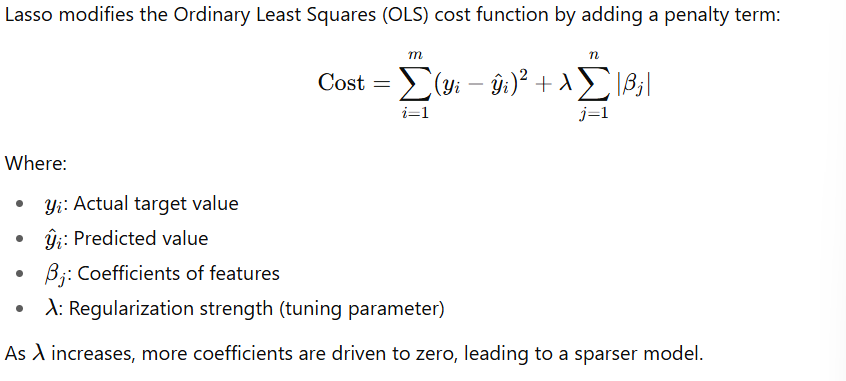

## ✅When to use Lasso Regression

Lasso Regression is useful in the following situations:

1. **Feature Selection**: It automatically selects most important features by reducing the coefficients of less significant features to zero.
2. **Collinearity:** When there is multicollinearity it can help us by reducing the coefficients of correlated variables and selecting only one of them.
3. **Regularization**: It helps preventing overfitting by penalizing large coefficients which is useful when the number of predictors is large.
4. **Interpretability**: Compared to traditional linear regression models that have all features lasso regression generates a model with fewer non-zero coefficients making model simpler to understand.

## 📈 Advantages of Lasso Regression

- **Feature Selection:** It removes the need to manually select most important features hence the developed regression model becomes simpler and more explainable.
- **Regularization:** It constrains large coefficients so a less biased model is generated which is robust and general in its predictions.
- **Interpretability:** This creates another models helps in making them simpler to understand and explain which is important in fields like healthcare and finance.
- **Handles Large Feature Spaces:** It is effective in handling high-dimensional data such as images and videos.

## ⚠️Disadvantages

- **Selection Bias:** Lasso may randomly select one variable from a group of highly correlated variables which leads to a biased model.
- **Sensitive to Scale:** It is sensitive to features with different scales as they can impact the regularization and affect model's accuracy.
- **Impact of Outliers:** It can be easily affected by the outliers in the given data which results to overfitting of the coefficients.
- **Model Instability:** It can be unstable when there are many correlated variables which causes it to select different features with small changes in the data.
- **Tuning Parameter Selection:** Analyzing different λ (alpha) values may be problematic but can be solved by cross-validation.

In [25]:
# Code for LASSO
## Importing libraries
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Generate dataset
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Lasso model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predictions
y_pred = lasso.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
print("Coefficients:", lasso.coef_)

MSE: 0.06362439921332456
Coefficients: [60.50305581 98.52475354 64.3929265  56.96061238 35.52928502]


---

# L2(Ridge)

Ridge regularization, or L2 regularization, adds the square of the model’s weights to the loss function. This penalty term encourages the model to use smaller weights, reducing the impact of individual features on the model’s output. Ridge regularization can help create a more stable and robust model, as it promotes smoothness in the weights.

Ridge Regression is a **linear regression technique** that incorporates **L2 regularization** to prevent overfitting and improve model generalization.

It’s particularly useful when predictors are **highly correlated** (multicollinearity) or when you have **more features than observations**.

## **🔧 How Ridge Regression Works**

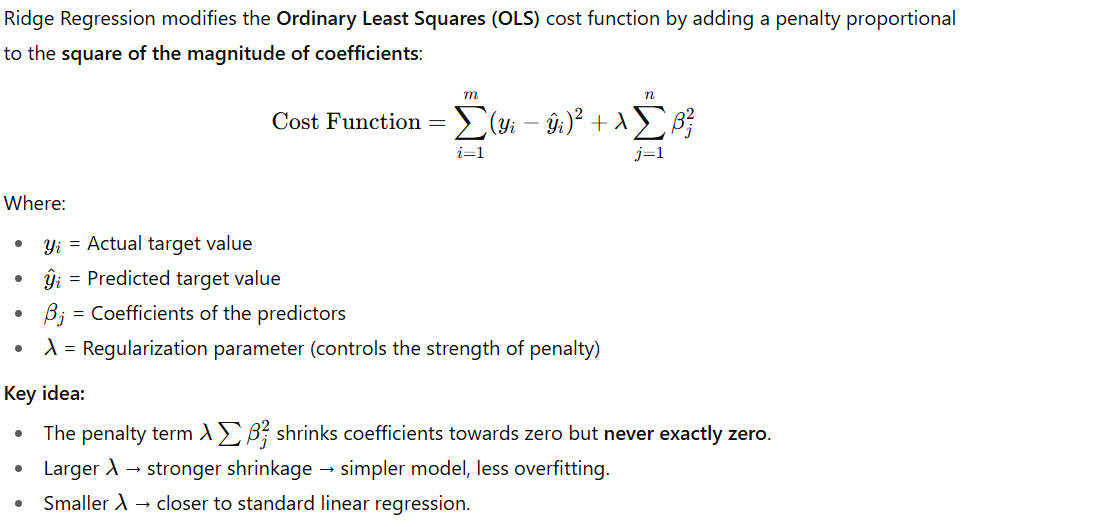

## ⚖️ Bias-Variance Tradeoff

- Ridge Regression **reduces variance** by penalizing large coefficients, which helps prevent overfitting.
- Increasing λ too much can increase bias, leading to **underfitting**.
- Choosing an optimal λ (via **cross-validation**) balances bias and variance.

## ✅ When to Use Ridge Regression

Ridge Regression is ideal when:

1. **Multicollinearity Exists**: Predictors are highly correlated → OLS coefficients become unstable.
2. **Many Features**: Number of predictors > number of observations.
3. **Overfitting Risk**: Standard linear regression performs poorly on unseen data.
4. **Need for Small Coefficients**: Helps reduce the influence of less important features without eliminating them.



## 📈 Advantages of Ridge Regression

- Handles multicollinearity effectively.
- Reduces model complexity and overfitting.
- Coefficients shrink but are never zero, so all features contribute.
- Stabilizes models with high-dimensional data.



## ⚠️ Disadvantages

- Does not perform **feature selection** (unlike Lasso).
- Still assumes a **linear relationship** between predictors and target.
- Choice of λ is crucial; wrong value → underfitting or overfitting.

## 🛠️ Ridge vs Lasso

| Feature | Ridge (L2) | Lasso (L1) |
| --- | --- | --- |
| Penalty | Sum of squared coefficients | Sum of absolute coefficients |
| Coefficient Shrinkage | Shrinks but never zero | Can shrink some coefficients to zero |
| Feature Selection | No | Yes |
| Use Case | Multicollinearity, many predictors | Feature selection, sparse models |



Ridge Coefficients: [2.69985029]
Ridge Intercept: [4.23604]
Mean Squared Error: 0.648
R² Score: 0.809


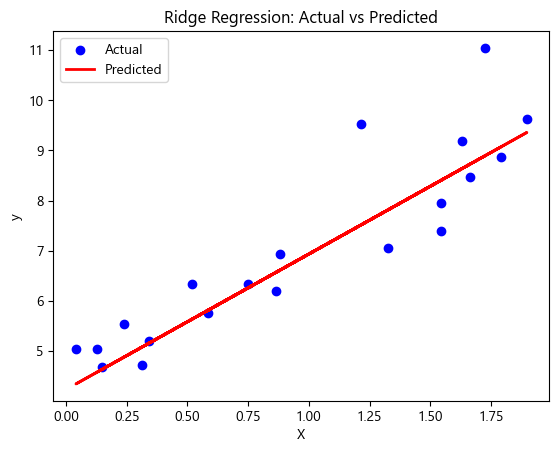

In [26]:
# 📌 Ridge Regression Example

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 🔹 Generate some sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relation with noise

# 🔹 Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Create Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # alpha = regularization strength
ridge_model.fit(X_train, y_train)

# 🔹 Make predictions
y_pred = ridge_model.predict(X_test)

# 🔹 Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ridge Coefficients: {ridge_model.coef_}")
print(f"Ridge Intercept: {ridge_model.intercept_}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R² Score: {r2:.3f}")

# 🔹 Plot results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title("Ridge Regression: Actual vs Predicted")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


#### ✅ What this code does:

- Generates synthetic linear data with some noise.

- Splits it into training and test sets.

- Creates a Ridge Regression model with regularization parameter alpha=1.0.

- Fits the model, makes predictions, and prints coefficients, intercept, MSE, and R².

- Plots the actual vs predicted values for visualization.



In [28]:
# for ridge regression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predictions and evaluation
y_pred = ridge.predict(X_test)
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred))
print("Ridge Regression Coefficients:", ridge.coef_)

Ridge Regression MSE: 0.5558034669932196
Ridge Regression Coefficients: [ 4.48510924e-01  9.72596535e-03 -1.23014157e-01  7.81416761e-01
 -2.02581346e-06 -3.52585878e-03 -4.19786908e-01 -4.33680793e-01]


### What does the code do?

- Load dataset: California Housing data (X = features, y = target).

- Split data: 80% train, 20% test.

- Create model: Ridge Regression with L2 regularization (alpha=1.0).

- Train model: Fit on training data.

- Predict & evaluate: Predict on test set, calculate MSE, and show feature coefficients.

---

# Effect on weights🎚️

## **1. What weights actually are**🏗️

- Weights are parameters of a model that multiply input features to produce predictions.
- Think of weights as knobs on your model. Each knob controls how much a feature matters.
- For example, if your model predicts house prices:
    - “Number of bedrooms” might get a high weight → very important.
    - “Color of the mailbox” might get a tiny weight → barely matters.
- Training your model is basically twisting all these knobs until the predictions match the data as best as possible.


## 2. How weights change (learning)⚡

- The model uses feedback from mistakes (loss function) to adjust weights.
- If your prediction is off, the model says: “Okay, I need to turn this knob a bit up or down.”
- Big mistakes → big turn, small mistakes → tiny turn
- That’s literally gradient descent in action.


## **3. How regularization affects weights**🛡️

- Without regularization, some knobs might turn way too high, memorizing quirks in the training data → overfitting.
- **L2 regularization (Ridge)** → gently pushes all knobs down so none get too extreme. Think of it as “keep it calm”.
- **L1 regularization (Lasso)** → aggressively turns some knobs all the way off. Only the most important features stay. Think of it as “cut the unnecessary stuff”.



## **4. How learning rate affects weights**🎢

- Learning rate = how much you twist the knobs per step.
- **Too high** → spin out of control, overshoot the best setting.
- **Too low** → painfully slow, like turning the knobs millimeter by millimeter.
- Sweet spot → just the right amount so weights settle nicely.

## **5. Effect of Feature Scaling**⚖️


- If features are not scaled, gradient descent can behave poorly.
- Large-scale features → weights may be disproportionately small/large.
- Standardization (mean 0, variance 1) ensures weights update evenly across features.

## **6. Feature scaling matters**⚖️

- Imagine knobs are linked to features with wildly different scales:
    - “Square footage” = 1000s
    - “Number of bathrooms” = single digits
- Without scaling, gradient updates will favor big numbers → weights won’t adjust fairly.
- Scaling features = leveling the playing field → all knobs turn properly.


## **7. In neural networks**🧠

- Every neuron has its own set of knobs (weights).
- Deep networks = lots of layers → feedback signal can get tiny (vanishing gradient) or huge (exploding gradient).
- Weight initialization + regularization = controls how these knobs start and behave so the network trains properly.



## **8. Real-world intuition**🌎

- **Big weights** → model depends heavily on certain features.
- **Tiny weights** → model ignores those features.
- **Zero weights** → feature completely irrelevant.
- Regularization is like a trainer forcing your model to only rely on the most useful features instead of memorizing the data.

## **Visual Understanding of Effect on Weights**

1. **Without regularization:**
    - Some weights grow large → model memorizes data → overfitting.
2. **With L2 (Ridge):**
    - Weights shrink → model smoother → better generalization.
3. **With L1 (Lasso):**
    - Some weights zero → only most important features kept → sparse model.
      
## **Summary Table**📊

| Factor | Effect on Weights |
| --- | --- |
| Gradient magnitude | Large → big update, Small → small update |
| Learning rate | High → fast/unstable, Low → slow/convergent |
| L2 Regularization | Shrinks weights, reduces overfitting |
| L1 Regularization | Drives some weights to zero (feature selection) |
| Feature scaling | Ensures fair weight updates across features |
| Weight initialization | Poor init → slow training, vanishing/exploding weights |

---

# 3. Ensemble Methods🧩🤖

Ensemble means a group of elements viewed as a whole rather than individually. An Ensemble method creates multiple models and combines them to solve it. Ensemble methods help to improve the robustness/generalizability of the model. In this article, we will discuss some methods with their implementation in Python. For this, we choose a dataset from the UCI repository.

- Definition: A technique that combines predictions from multiple models to improve accuracy, reduce overfitting, and make more robust predictions.

- Idea: “Two heads are better than one” – by combining weak or strong models, the ensemble can outperform individual models.

- Use: Works for both classification and regression problems.


## **Types of Ensemble Methods**🔄

### **A. Bagging (Bootstrap Aggregating)**🏗️

- **Goal:** Reduce variance (overfitting).
- **How it works:**
    1. Take multiple random samples (with replacement) from the training data.
    2. Train a separate model on each sample.
    3. Aggregate predictions:
        - Classification → Majority voting
        - Regression → Average prediction
- **Key Idea:** Each model sees a slightly different dataset, so errors are “averaged out.”
- **Example:** Random Forest (an ensemble of Decision Trees)

### **B. Boosting**⚡

- **Goal:** Reduce bias (underfitting) and improve performance.
- **How it works:**
    1. Train models sequentially, each new model focuses on the errors of previous ones.
    2. Combine predictions in a weighted manner.
- **Popular Algorithms:**
    - AdaBoost
    - Gradient Boosting
    - XGBoost
    - LightGBM, CatBoost
- **Key Idea:** “Learn from mistakes” – each model tries to fix what the previous one got wrong.

### **C. Stacking (Stacked Generalization)**🏗️

- **Goal:** Combine different types of models to improve prediction.
- **How it works:**
    1. Train multiple base models on the same dataset.
    2. Use their predictions as input for a meta-model (e.g., Logistic Regression) that makes the final prediction.
- **Key Idea:** The meta-model learns which model is more trustworthy in different cases.

### **D. Voting**🗳️

- **Simple ensemble for classification.**
- **Types:**
    - **Hard Voting:** Take majority class from multiple models.
    - **Soft Voting:** Take the class with the highest average probability.
- **Key Idea:** Aggregates predictions without changing the training process.

## **3. Advantages of Ensemble Methods**🌟

- Higher accuracy and generalization.
- Reduces overfitting (Bagging) or underfitting (Boosting).
- Works with weak learners to make a strong predictor.
- Flexible – can combine any models.

## **4. Disadvantages**⚠️

- More complex and slower to train.
- Harder to interpret than single models.
- Large ensembles require more memory and computation.

## **5. Quick Comparison Table**📝

| Method | Reduces | Strategy | Example |
| --- | --- | --- | --- |
| Bagging | Variance | Parallel models | Random Forest |
| Boosting | Bias | Sequential models | AdaBoost, XGBoost |
| Stacking | Both | Meta-model | Any combination |
| Voting | – | Aggregate outputs | Hard/Soft voting |

---

In [34]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Optional: XGBoost
import xgboost as xgb

# Load Iris dataset 🌸
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and test sets 🔀
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -------------------------
# 1. Random Forest (Bagging) 🌲
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# -------------------------
# 2. XGBoost (Boosting) 🚀
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

# -------------------------
# 3. Stacking 🏗️
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('svc', SVC(probability=True))
]
stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_model.fit(X_train, y_train)
y_pred_stack = stack_model.predict(X_test)
print("Stacking Accuracy:", accuracy_score(y_test, y_pred_stack))

# -------------------------
# 4. Voting 🗳️
voting_model = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression()),
        ('dt', DecisionTreeClassifier()),
        ('svc', SVC(probability=True))
    ],
    voting='soft'  # 'hard' for majority vote
)
voting_model.fit(X_train, y_train)
y_pred_voting = voting_model.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))


Random Forest Accuracy: 1.0
XGBoost Accuracy: 1.0
Stacking Accuracy: 1.0
Voting Classifier Accuracy: 1.0


---
# Bagging (Random Forest)🌳🤖

# **Bagging (Bootstrap Aggregating)** 🏗️🤖

**Definition:**

Bagging, also known as bootstrap aggregation, is the ensemble learning method that is commonly used to reduce variance within a noisy data set.
Bagging is an ensemble learning technique that combines predictions from multiple models trained on random subsets of the dataset to reduce variance and improve accuracy. 

**Idea:** “Many weak models together make a stronger model” 

**Use:** Works for classification  and regression  tasks.



## **How Bagging Works** ⚙️

1. **Take Random Samples** 
    - Create multiple datasets by sampling from the original dataset with replacement (bootstrap sampling).
2. **Train Separate Models** 
    - Train the same type of model (e.g., decision tree) on each random subset.
3. **Combine Predictions** 
    - **Classification:** Use majority voting
    - **Regression:** Use average prediction
4. **Key Idea:**
    - Each model sees slightly different data, so errors are averaged out

## **Advantages of Bagging** 🌟✅

- Reduces overfitting and variance
- Can improve accuracy with unstable models like decision trees
- Easy to implement and parallelize
- Works well with large datasets



## **Limitations of Bagging** ⚠️❌

- **Doesn’t reduce bias**: Cannot fix underfitting problems
- Can be computationally expensive
- Less interpretable than a single model



## **Popular Algorithms Using Bagging** 🛠️

- **Random Forest** 🌲 – ensemble of decision trees using bagging + feature randomness
- **Bagged Decision Trees** 🏗️ – simple decision trees combined via bagging




In [38]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset 
iris = load_iris()
X = iris.data
y = iris.target
# Split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Bagging Classifier (newer scikit-learn) 
bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),  # use 'estimator' instead of 'base_estimator'
    n_estimators=100,
    random_state=42
)

# Train the model 
bag_model.fit(X_train, y_train)

# Predict and evaluate 
y_pred = bag_model.predict(X_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred))


Bagging Classifier Accuracy: 1.0


---

# Random Forest
Random Forest is a machine learning algorithm that uses many decision trees to make better predictions. Each tree looks at different random parts of the data and their results are combined by voting for classification or averaging for regression. This helps in improving accuracy and reducing errors.

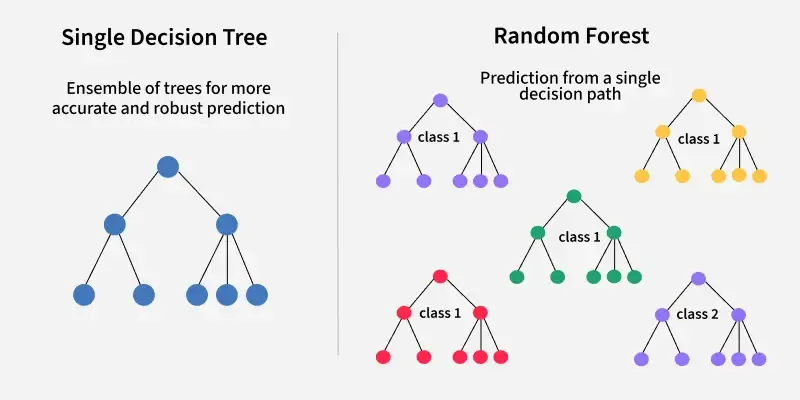

## 1. Working of Random Forest Algorithm⚙️

- **Create Many Decision Trees:** The algorithm makes many decision trees each using a random part of the data. So every tree is a bit different.
- **Pick Random Features:** When building each tree it doesn’t look at all the features (columns) at once. It picks a few at random to decide how to split the data. This helps the trees stay different from each other.
- **Each Tree Makes a Prediction:** Every tree gives its own answer or prediction based on what it learned from its part of the data.
- **Combine the Predictions:**
    - For **classification** we choose a category as the final answer is the one that most trees agree on i.e majority voting.
    - For **regression** we predict a number as the final answer is the average of all the trees predictions.
- **Why It Works Well:** Using random data and features for each tree helps avoid overfitting and makes the overall prediction more accurate and trustworthy.

## 2. Key Features of Random Forest✨

- **Handles Missing Data:** It can work even if some data is missing so you don’t always need to fill in the gaps yourself.
- **Shows Feature Importance:** It tells you which features (columns) are most useful for making predictions which helps you understand your data better.
- **Works Well with Big and Complex Data:** It can handle large datasets with many features without slowing down or losing accuracy.
- **Used for Different Tasks:** You can use it for both classification like predicting types or labels and regression like predicting numbers or amounts.

## 3. Assumptions of Random Forest🧠

- **Each tree makes its own decisions**: Every tree in the forest makes its own predictions without relying on others.
- **Random parts of the data are used**: Each tree is built using random samples and features to reduce mistakes.
- **Enough data is needed**: Sufficient data ensures the trees are different and learn unique patterns and variety.
- **Different predictions improve accuracy**: Combining the predictions from different trees leads to a more accurate final result.

## 4. Implementing Random Forest for Classification Tasks🖥️

Here we will predict survival rate of a person in titanic.

- Import libraries and load the Titanic dataset.
- Remove rows with missing target values ('Survived').
- Select features like class, sex, age, etc and convert 'Sex' to numbers.
- Fill missing age values with the median.
- Split the data into training and testing sets, then train a Random Forest model.
- Predict on test data, check accuracy and print a sample prediction result.


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

titanic_data = titanic_data.dropna(subset=['Survived'])

X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic_data['Survived']

X.loc[:, 'Sex'] = X['Sex'].map({'female': 0, 'male': 1})

X.loc[:, 'Age'].fillna(X['Age'].median(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

sample = X_test.iloc[0:1]
prediction = rf_classifier.predict(sample)

sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Passenger: {sample_dict}")
print(f"Predicted Survival: {'Survived' if prediction[0] == 1 else 'Did Not Survive'}")

Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Sample Passenger: {'Pclass': 3, 'Sex': 1, 'Age': 28.0, 'SibSp': 1, 'Parch': 1, 'Fare': 15.2458}
Predicted Survival: Did Not Survive


## 5. Implementing Random Forest for Regression Tasks

We will do house price prediction here.

- Load the California housing dataset and create a DataFrame with features and target.
- Separate the features and the target variable.
- Split the data into training and testing sets (80% train, 20% test).
- Initialize and train a Random Forest Regressor using the training data.
- Predict house values on test data and evaluate using MSE and R² score.
- Print a sample prediction and compare it with the actual value.

In [33]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

california_housing = fetch_california_housing()
california_data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
california_data['MEDV'] = california_housing.target

X = california_data.drop('MEDV', axis=1)
y = california_data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

single_data = X_test.iloc[0].values.reshape(1, -1)
predicted_value = rf_regressor.predict(single_data)
print(f"Predicted Value: {predicted_value[0]:.2f}")
print(f"Actual Value: {y_test.iloc[0]:.2f}")

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Predicted Value: 0.51
Actual Value: 0.48
Mean Squared Error: 0.26
R-squared Score: 0.81


## 6. Advantages of Random Forest🌟✅

- Random Forest provides very accurate predictions even with large datasets.
- Random Forest can handle missing data well without compromising with accuracy.
- It doesn’t require normalization or standardization on dataset.
- When we combine multiple decision trees it reduces the risk of overfitting of the model.

## 7. Limitations of Random Forest⚠️❌

- It can be computationally expensive especially with a large number of trees.
- It’s harder to interpret the model compared to simpler models like decision trees.

---

# **Boosting (AdaBoost, Gradient Boosting, XGBoost overview)**

# Boosting⚡🤖

Boosting is an ensemble learning technique that sequentially combines multiple weak classifiers to create a strong classifier. It is done by training a model using training data and is then evaluated. Next model is built on that which tries to correct the errors present in the first model. This procedure is continued and models are added until either the complete training data set is predicted correctly or predefined number of iterations is reached.

Think of it like in a class a teacher focuses more on weak learners to improve its academic performance similarly boosting works.

## Types Of Boosting Algorithms🛠️

There are several types of boosting algorithms some of the most famous and useful models are as :

1. **Gradient Boosting: Gradient Boosting** constructs models in a sequential manner where each weak learner minimizes the residual error of the previous one using gradient descent. Instead of adjusting sample weights like AdaBoost Gradient Boosting reduces error directly by optimizing a loss function.
2. **XGBoost:** XGBoost is an optimized version of Gradient Boosting that uses regularization to prevent overfitting. It is faster, efficient and supports handling both numerical and categorical variables.
3. **CatBoost: CatBoost** is particularly effective for datasets with categorical features. It employs symmetric decision trees and a unique encoding method that considers target values, making it superior in handling categorical data without preprocessing.

## Boosting vs Bagging🔄🆚🌲

Bagging is another ensemble learning technique used to improve accuracy. Unlike bagging where models are trained independently on different machine learning models, Boosting models are trained sequentially with each model correcting the errors of its predecessor. Here is a in depth difference between them:

| **Feature** |  **Boosting** | **Bagging**  |
| --- | --- | --- |
| **Combination Type** | Combines predictions of different weak models | Combines predictions of the same type of model |
| **Goal** | Reduces **bias** | Reduces **variance** |
| **Model Dependency** | New models depend on previous models' errors | All the models have the same weightage |
| **Weighting** | Models are weighted based on performance | All models have equal weight. |
| **Training Data Sampling** | Each new model focuses more on the misclassified examples | Each model is trained on random subset of data |
| **Error handling** | Focuses on correcting errors made by previous models | Averages out errors from multiple models |
| **Parallelism** | Models are built sequentially less parallelizable | Models can be built in parallel |
| **Overfitting** | Less prone to overfitting with proper regularization | Can be prone to overfitting with complex base models |
| **Model Complexity** | Typically uses simpler models (like decision stumps) | Can use complex models (like full decision trees) |
| **Example** | AdaBoost, Gradient Boosting, XGBoost, LightGBM | Random Forest, Bagged Decision Trees |

# Advantages of Boosting🌟✅

- **Improved Accuracy**: By combining multiple weak learners it enhances predictive accuracy for both classification and regression tasks.
- **Robustness to Overfitting**: Unlike traditional models it dynamically adjusts weights to prevent overfitting.
- **Handles Imbalanced Data Well**: It prioritizes misclassified points making it effective for imbalanced datasets.
- **Better Interpretability**: The sequential nature of helps break down decision-making making the model more interpretable.

---

# AdaBoost

AdaBoost means Adaptive Boosting which is a ensemble learning technique that combines multiple weak classifiers to create a strong classifier. It works by sequentially adding classifiers to correct the errors made by previous models giving more weight to the misclassified data points. In this article we will learn to implement AdaBoost algorithm from scratch.

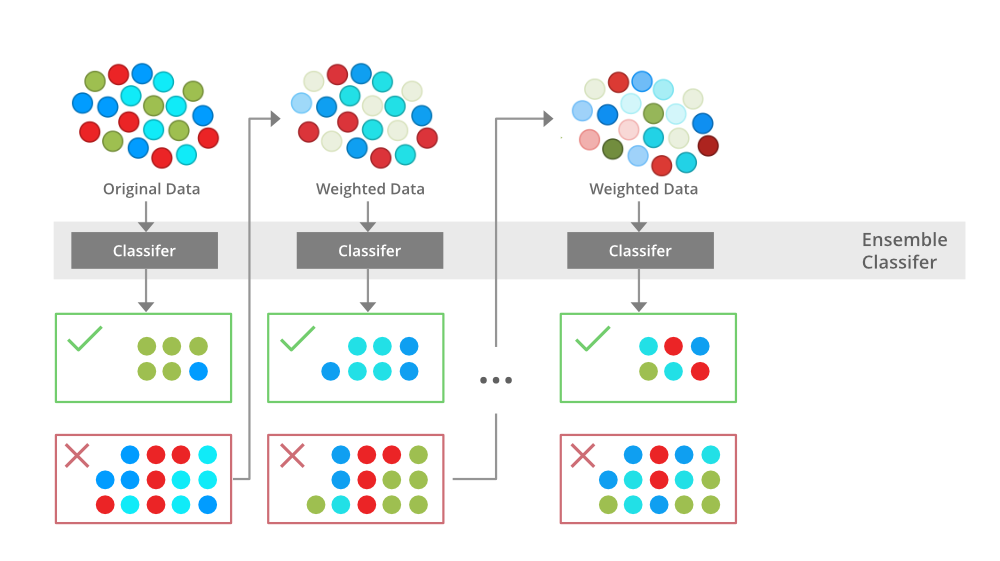

## **How AdaBoost Works – Step by Step (Moderate Detail)**

1. **Initialize sample weights:** Every training example starts with the same weight, meaning each sample is equally important at the start.
2. **Train a weak classifier:** Pick a simple model (like a decision stump) and train it on the weighted data. The model doesn’t have to be perfect — just slightly better than random guessing.
3. **Compute classifier error & weight:** Check how many samples it got wrong (taking sample weights into account). Weak classifiers with lower error get higher influence in the final model.
4. **Update sample weights:** Increase the weights of misclassified examples. This makes the next weak classifier focus more on the “hard” samples that previous classifiers struggled with.
5. **Normalize weights:** Make sure the total weights still sum up to 1, keeping things consistent for the next iteration.
6. **Repeat:** Steps 2–5 are repeated for a set number of iterations (or until performance stops improving). Each iteration produces a new weak classifier.
7. **Final prediction:** Combine all the weak classifiers’ predictions using a weighted majority vote, where stronger classifiers have more say. This aggregation forms the final strong classifier.

**Key idea:** AdaBoost adapts to mistakes. By focusing more on the hard-to-classify samples and giving better classifiers more influence, it turns a bunch of weak models into a strong, accurate predictor.

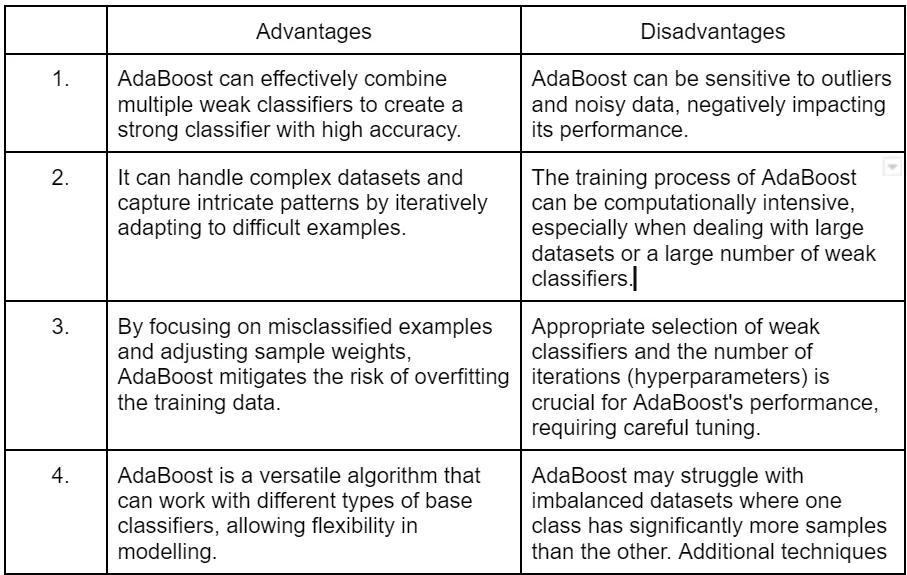

In [48]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset 
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize AdaBoost with decision tree as weak learner 🏹
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)

# Train the model 
ada_model.fit(X_train, y_train)

# Predict and evaluate 
y_pred_ada = ada_model.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))


AdaBoost Accuracy: 1.0


In [49]:
# Import libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Generate synthetic regression data
X, y = make_regression(n_samples=500, n_features=5, noise=10, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AdaBoost Regressor with Decision Stump as base estimator
ab_reg = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=1),  # updated parameter
    n_estimators=50,
    learning_rate=0.5,
    random_state=42
)

# Train the model
ab_reg.fit(X_train, y_train)

# Predict on test data
y_pred = ab_reg.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print("AdaBoost Regression MSE:", mse)

AdaBoost Regression MSE: 4430.620947369858


### Explanation 

- **Imports**:
    - `make_regression` → create synthetic regression data.
    - `train_test_split` → split data into train/test sets.
    - `AdaBoostRegressor` → ensemble model for regression.
    - `DecisionTreeRegressor` → weak learner (base estimator).
    - `mean_squared_error` → evaluate regression performance.
- **Generate data**:
    - `n_samples=500`, `n_features=5`, `noise=10`.
    - Creates dataset `X` (features) and `y` (targets).
- **Split data**:
    - 80% training, 20% testing.
    - `random_state=42` ensures reproducibility.
- **Create AdaBoost Regressor**:
    - Base estimator: Decision Tree stump (`max_depth=1`).
    - `n_estimators=50` → number of weak learners combined.
    - `learning_rate=0.5` → scales each learner’s contribution.
    - Sequentially focuses on samples with higher prediction errors.
- **Train model**:
    - `fit()` trains AdaBoost on training data.
    - Weak learners are added iteratively, correcting previous errors.
- **Predict**:
    - `predict()` generates predictions on test set.
- **Evaluate**:
    - `mean_squared_error` calculates MSE between true and predicted values.
    - Lower MSE → better regression performance.

--- 
# XGBoost

Traditional machine learning models like decision trees and random forests are easy to interpret but often struggle with accuracy on complex datasets. XGBoost short form for eXtreme Gradient Boosting is an advanced machine learning algorithm designed for efficiency, speed and high performance.

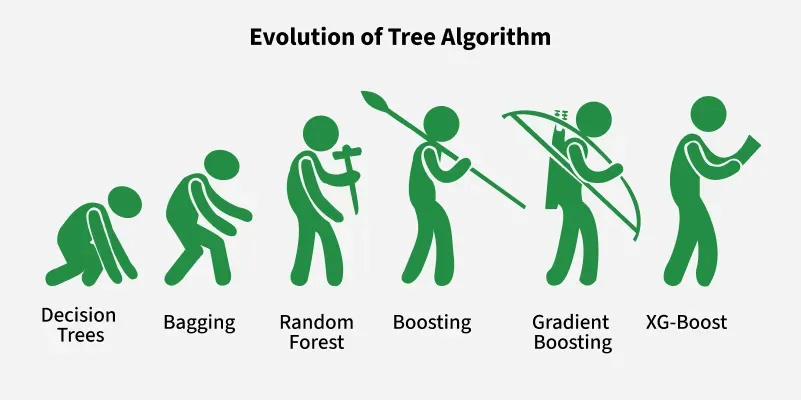

# How XGBoost Works?🤔

It builds decision trees sequentially with each tree attempting to correct the mistakes made by the previous one. The process can be broken down as follows:

1. **Start with a base learner**: The first model decision tree is trained on the data. In regression tasks this base model simply predicts the average of the target variable.
2. **Calculate the errors**: After training the first tree the errors between the predicted and actual values are calculated.
3. **Train the next tree**: The next tree is trained on the errors of the previous tree. This step attempts to correct the errors made by the first tree.
4. **Repeat the process**: This process continues with each new tree trying to correct the errors of the previous trees until a stopping criterion is met.
5. **Combine the predictions**: The final prediction is the sum of the predictions from all the trees.


## What Makes XGBoost "eXtreme"?⚡

XGBoost extends traditional gradient boosting by including regularization elements in the objective function, XGBoost improves generalization and prevents overfitting.

### 1. Preventing Overfitting🛡️

- Learning rate (eta) controls each tree's contribution to the final prediction
- Lower learning rate makes the model more conservative and resilient
- Helps reduce overfitting when combined with regularization
- XGBoost grows trees level by level (depth-wise)
- At each level it checks if a new split improves the objective function
- Splits that don't improve the model are trimmed (pruned)
- This makes trees simpler and faster to build
- Regularization, shrinkage (learning rate) and pruning help prevent overfitting
- These techniques improve generalization and model robustness

### 2. Tree Structure🌳

Conventional decision trees are frequently developed by expanding each branch until a stopping condition is satisfied or in a depth-first fashion. On the other hand, XGBoost builds trees level-wise or breadth-first. This implies that it adds nodes for every feature at a certain depth before moving on to the next level, so growing the tree one level at a time.

- **Determining the Best Splits**: XGBoost assesses every split that might be made for every feature at every level and chooses the one that minimizes the objective function as much as feasible like minimizing the mean squared error for regression tasks or cross-entropy for classification tasks.

In contrast, a single feature is selected for a split at each level in depth-wise expansion.

- **Prioritizing Important Features**: The overhead involved in choosing the best split for each feature at each level is decreased by level-wise growth. XGBoost eliminates the need to revisit and assess the same feature more than once during tree construction because all features are taken into account at the same time.

This is particularly beneficial when there are complex interactions among features as the algorithm can adapt to the intricacies of the data.

### 3. Handling Missing Data🕳️

- XGBoost handles missing data effectively during training
- Uses Sparsity Aware Split Finding algorithm
- Treats missing values as a separate category during split evaluation
- During tree building, missing values follow a default direction at each split
- Algorithm calculates gain for splits, considering missing values as a separate group
- For prediction if a feature is missing then instance follows the default branch
- This ensures robust predictions even with incomplete input data

### 4. Cache-Aware Access in XGBoost⚡💻

- Cache memory is faster and located close to the CPU
- Modern systems use hierarchical memory for better performance
- XGBoost uses cache-aware access to reduce memory access time
- Frequently accessed data is stored in CPU cache during training
- Uses spatial locality: nearby data in memory is accessed together
- Data is arranged in a cache-friendly way to speed up computation
- Reduces reliance on slower main memory, improving training speed

In [41]:
# Import library
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load Iris dataset 
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize XGBoost Classifier 
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,  # required to suppress warning
    eval_metric='mlogloss',
    n_estimators=100,
    random_state=42
)

# Train the model 
xgb_model.fit(X_train, y_train)

# Predict and evaluate 
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Accuracy: 1.0


### Explanation of code

- **Imports**:
    - `xgboost as xgb` → XGBoost library for gradient boosting.
    - `accuracy_score` → evaluate classification performance.
    - `train_test_split` → split dataset into training and testing sets.
    - `load_iris` → built-in Iris dataset.
- **Load data**:
    - `X` → all features of Iris dataset.
    - `y` → target classes (0, 1, 2).
- **Split data**:
    - 70% training, 30% testing.
    - `random_state=42` ensures reproducibility.
- **Initialize XGBoost Classifier**:
    - `use_label_encoder=False` → disables deprecated label encoder warning.
    - `eval_metric='mlogloss'` → multi-class log-loss for evaluation.
    - `n_estimators=100` → number of boosting rounds (trees).
    - `random_state=42` → ensures reproducible results.
- **Train model**:
    - `fit(X_train, y_train)` → trains the XGBoost classifier on training data.
    - XGBoost builds trees sequentially, each correcting errors of previous trees.
- **Predict & evaluate**:
    - `predict(X_test)` → generates class predictions for test set.
    - `accuracy_score(y_test, y_pred_xgb)` → calculates proportion of correctly classified samples.
- **Output**:
    - Prints `"XGBoost Accuracy:"` with the model’s accuracy on test data.

---

# Gradent Boosting

Gradient Boosting constructs models in a sequential manner where each weak learner minimizes the residual error of the previous one using gradient descent. Instead of adjusting sample weights like AdaBoost Gradient Boosting reduces error directly by optimizing a loss function.

In gradient boosting each new model is trained to minimize the loss function such as mean squared error or cross-entropy of the previous model using gradient boosting. In each iteration the algorithm computes the gradient of the loss function with respect to predictions and then trains a new weak model to minimize this gradient. Predictions of the new model are then added to the ensemble (all models prediction) and the process is repeated until a stopping criterion is met.

## **Gradient Boosting – Working Notes** 🌟

### **1. Sequential Learning Process 🔄**

- Gradient Boosting builds an ensemble of trees sequentially.
- **Tree 1** is trained on the original data X and true labels y.
- Predictions from Tree 1 are used to calculate errors (residuals).


### **2. Residuals Calculation 📉**

- **Tree 2** is trained on the same features X, but the residuals of Tree 1 are used as labels.
- Each subsequent tree is trained to predict the errors of the previous tree.
- This iterative process continues until all trees are trained.

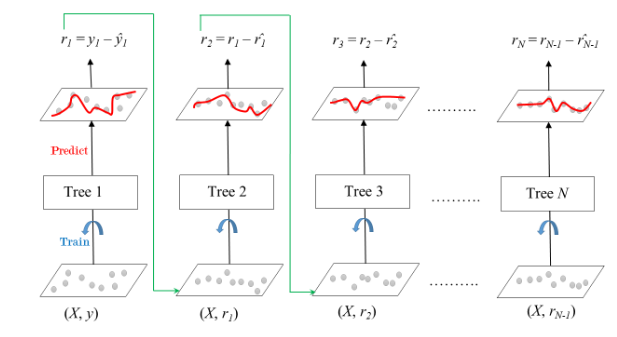

### **3. Shrinkage (Learning Rate) 💧**

- After training, each tree’s predictions are scaled by the learning rate η (0 < η ≤ 1).
- This prevents overfitting by limiting each tree’s influence.

### **4. Final Prediction 🧮**

- The predictions of all trees are summed together, weighted by the learning rate:
  
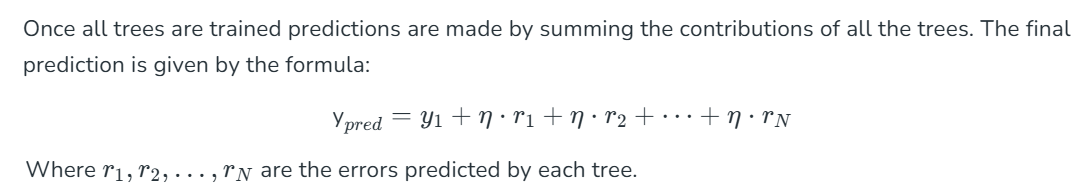

## Difference between AdaBoost and Gradient Boosting

| **Features** | **AdaBoost** | **Gradient Boosting** |
| --- | --- | --- |
| **Weight Update Strategy** | Increase weights of misclassified sample so that the next learner focuses more on them. | Updates predictions by minimizing a loss function using the negative gradient |
| **Base learners** | AdaBoost uses simple decision trees with one split known as the decision stumps of weak learners. | Gradient Boosting can use a wide range of base learners such as decision trees and linear models. |
| **Sensitivity to Noise** | AdaBoost is more sensitive to noisy data and outliers due to aggressive weighting. | Gradient Boosting is less sensitive as it smooths updates using gradients. |
| **Optimization Technique** | No explicit loss function i.e it focuses on classification error. | Explicitly minimizes a differentiable loss function. |
| **Boosting Mechanism** | Learners are trained sequentially with sample reweighting. | Learners are trained sequentially with residual fitting (gradient descent). |
| **Interpretability** | Easier to interpret due to simple weak learners. | Harder to interpret if complex models are used. |
| **Use case** | Suitable for clean datasets with fewer outliers | Suitable for complex problems with varying loss function |

## Implementing Gradient Boosting for Classification and Regression
Here are two examples to demonstrate how Gradient Boosting works for both classification and regression. But before that let's understand gradient boosting parameters.

n_estimators: This specifies the number of trees (estimators) to be built. A higher value typically improves model performance but increases computation time.
learning_rate: This is the shrinkage parameter. It scales the contribution of each tree.
random_state: It ensures reproducibility of results. Setting a fixed value for random_state ensure that you get the same results every time you run the model.
max_features: This parameter limits the number of features each tree can use for splitting. It helps prevent overfitting by limiting the complexity of each tree and promoting diversity in the model.

## Classification

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

SEED = 23

X, y = load_digits(return_X_y=True)

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = SEED)

gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
                                 
gbc.fit(train_X, train_y)

pred_y = gbc.predict(test_X)

acc = accuracy_score(test_y, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))

Gradient Boosting Classifier accuracy is : 0.98


- Import the necessary libraries
- Setting SEED for reproducibility
- Load the digit dataset and split it into train and test.
- Instantiate Gradient Boosting classifier and fit the model.
- Predict the test set and compute the accuracy score.

## Regression

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

SEED = 23

X, y = load_diabetes(return_X_y=True)

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = SEED)

gbr = GradientBoostingRegressor(loss='absolute_error',
                                learning_rate=0.1,
                                n_estimators=300,
                                max_depth = 1, 
                                random_state = SEED,
                                max_features = 5)

gbr.fit(train_X, train_y)

pred_y = gbr.predict(test_X)

test_rmse = mean_squared_error(test_y, pred_y) ** (1 / 2)

print('Root mean Square error: {:.2f}'.format(test_rmse))

Root mean Square error: 56.39


We use Gradient Boosting Regressor on the Diabetes dataset to predict continuous values:

- Import the necessary libraries
- Setting SEED for reproducibility
- Load the diabetes dataset and split it into train and test.
- Instantiate Gradient Boosting Regressor and fit the model.
- Predict on the test set and compute RMSE.

---

# Hands On

##  Ridge vs Lasso Comparison


In [44]:

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
ridge = Ridge(alpha=1.0, random_state=42)
lasso = Lasso(alpha=0.1, random_state=42)

# Train models
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Predictions
ridge_train_pred = ridge.predict(X_train)
ridge_test_pred = ridge.predict(X_test)
lasso_train_pred = lasso.predict(X_train)
lasso_test_pred = lasso.predict(X_test)

# Evaluate
results = {
    "Model": ["Ridge", "Lasso"],
    "Train MSE": [
        mean_squared_error(y_train, ridge_train_pred),
        mean_squared_error(y_train, lasso_train_pred)
    ],
    "Test MSE": [
        mean_squared_error(y_test, ridge_test_pred),
        mean_squared_error(y_test, lasso_test_pred)
    ],
    "Non-zero Coefficients": [
        sum(ridge.coef_ != 0),
        sum(lasso.coef_ != 0)
    ]
}

df_results = pd.DataFrame(results)
print(df_results)

# Show coefficients shrinkage
coef_df = pd.DataFrame({
    "Feature": housing.feature_names,
    "Ridge Coeff": ridge.coef_,
    "Lasso Coeff": lasso.coef_
})
print("\nCoefficient Comparison:")
print(coef_df)


   Model  Train MSE  Test MSE  Non-zero Coefficients
0  Ridge   0.523358  0.530505                      8
1  Lasso   0.608064  0.597051                      6

Coefficient Comparison:
      Feature   Ridge Coeff  Lasso Coeff
0      MedInc  4.456403e-01     0.390945
1    HouseAge  9.683907e-03     0.015060
2    AveRooms -1.217486e-01    -0.000000
3   AveBedrms  7.766705e-01     0.000000
4  Population -7.704474e-07     0.000018
5    AveOccup -3.369492e-03    -0.003065
6    Latitude -4.185296e-01    -0.115484
7   Longitude -4.336561e-01    -0.101649


# Explanation of code 

- 📥 **Import libraries** → load datasets, split data, train Ridge/Lasso, evaluate with MSE, manage results in pandas.
- 🏡 **Load California Housing dataset** → `X` = features, `y` = target (house prices).
- ✂️ **Split dataset** → training (70%) + testing (30%) with `random_state=42` for reproducibility.
- ⚙️ **Initialize models** → Ridge (L2 regularization) & Lasso (L1 regularization).
- 🎓 **Train models** → fit both Ridge and Lasso on training data.
- 🔮 **Predict** → get predictions for train and test sets for each model.
- 📊 **Evaluate** → compute **Train MSE**, **Test MSE**, and number of **non-zero coefficients** (Lasso can set some to 0).
- 🗒️ **Store results** → save in dictionary → convert to pandas DataFrame → print performance summary.
- 🧾 **Compare coefficients** → create DataFrame of feature names with Ridge & Lasso coefficients → print to see shrinkage effect.

---

# Train a Random Forest and check feature importance

In [45]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Load dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target
feature_names = housing.feature_names

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Random Forest
rf = RandomForestRegressor(
    n_estimators=100,  # number of trees
    random_state=42,
    n_jobs=-1          # use all CPU cores
)
rf.fit(X_train, y_train)

# Feature importance
importance = rf.feature_importances_

# Store results in a DataFrame
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

print("Feature Importances:")
print(importance_df)


Feature Importances:
      Feature  Importance
0      MedInc    0.526011
5    AveOccup    0.138220
7   Longitude    0.086124
6    Latitude    0.086086
1    HouseAge    0.054654
2    AveRooms    0.047188
4  Population    0.031722
3   AveBedrms    0.029995


### Code Explanation 

- 📥 **Import libraries** → load dataset, split data, train Random Forest, and use pandas to store results.
- 🏡 **Load California Housing dataset** → `X` = features (like income, house age, etc.), `y` = target (median house value).
- ✂️ **Split dataset** → training (70%) and testing (30%) using `train_test_split`.
- 🌲 **Initialize RandomForestRegressor** →
    - `n_estimators=100` → build 100 trees.
    - `random_state=42` → reproducible results.
    - `n_jobs=-1` → use all CPU cores (faster training).
- 🎓 **Train model** → fit random forest on training data.
- 🔍 **Calculate feature importance** → `rf.feature_importances_` gives how much each feature contributes to reducing prediction error.
- 📊 **Store results** → create DataFrame with feature names + importance values, then sort by most important.
- 🖨️ **Print output** → shows ranked list of most important features (e.g., "MedInc" usually comes top).

---

# Math Focus

## Regularization penalty terms

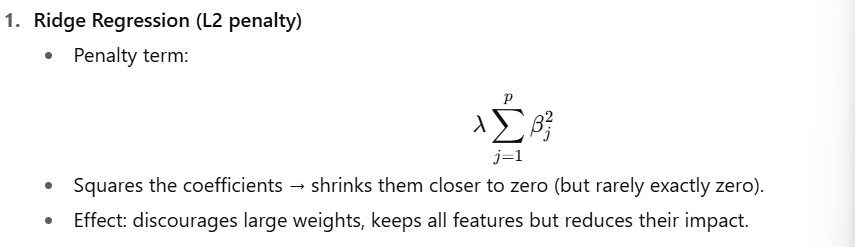

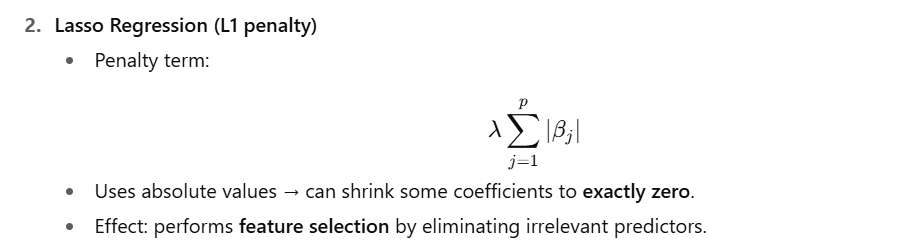

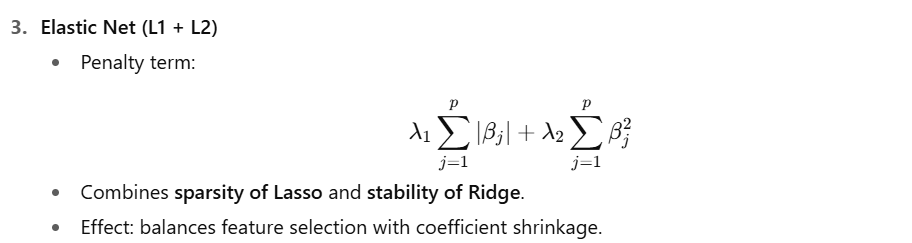

### 👉 Key takeaway:

- L2 (Ridge) = shrink coefficients, keep all.

- L1 (Lasso) = shrink some to zero, feature selection.

- L1 + L2 (Elastic Net) = combo, best for correlated features.